In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unidecode

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
synthese_df = pd.read_csv('../data/raw/Agribalyse_Synthese.csv')
ingred_df = pd.read_csv('../data/raw/Agribalyse_Detail ingredient.csv')

In [4]:
synthese_df.head(4)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726


In [5]:
synthese_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 27 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Code AGB                                                                  2479 non-null   object 
 1   Code CIQUAL                                                               2479 non-null   int64  
 2   Groupe d'aliment                                                          2479 non-null   object 
 3   Sous-groupe d'aliment                                                     2479 non-null   object 
 4   Nom du Produit en Français                                                2479 non-null   object 
 5   LCI Name                                                                  2479 non-null   object 
 6   Saisonnalité                                                    

In [6]:
ingred_df.head(4)

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012


## Remove espaces and special characters from titles

### Functions to format column names

In [7]:
def remove_quotes(raw_text):
    '''
    Remove quotes from word contractions in raw_text. For ex. d'emballage --> emballage
    '''
    clean_text = re.sub('\w+\'', '', raw_text)
    return clean_text

In [8]:
def format_column_name(name) ->str:
    '''
    Format a name by removing short words like de, aux,... and replacing espaces with underscores (_)
    '''
    #new_name = remove_quotes(name)
    tokens = [remove_quotes(unidecode.unidecode(token)) for token in name.split('(')[0].strip().split(' ')]
    if len(tokens) >2:
        tokens = [token for token in tokens if len(token) > 3]
    new_name = '_'.join(tokens)
    return new_name

In [9]:
num_features = synthese_df.select_dtypes(include=np.number).columns.to_list()
cat_features = synthese_df.select_dtypes(exclude=np.number).columns.to_list()

### Change column names

In [23]:
def change_column_names(data_df):
    new_names = [format_column_name(name) for name in data_df.columns.to_list()] 
    return new_names

In [10]:
new_names = [format_column_name(name) for name in synthese_df.columns.to_list()]
print(new_names)
synthese_df.columns = new_names

['Code_AGB', 'Code_CIQUAL', 'Groupe_aliment', 'Sous-groupe_aliment', 'Produit_Francais', 'LCI_Name', 'Saisonnalite', 'Transport_avion', 'Livraison', 'Materiau_emballage', 'Preparation', 'Note_qualite_donnee', 'Score_unique', 'Changement_climatique', 'Appauvrissement_couche_ozone', 'Rayonnements_ionisants', 'Formation_photochimique_ozone', 'Particules', 'Acidification_terrestre_eaux_douces', 'Eutrophisation_terreste', 'Eutrophisation_eaux_douces', 'Eutrophisation_marine', 'Utilisation', 'Ecotoxicite_pour_ecosystemes_aquatiques_douce', 'Epuisement_ressources', 'Epuisement_ressources_energetiques', 'Epuisement_ressources_mineraux']


In [24]:
ingred_df.columns = change_column_names(ingred_df)

In [11]:
synthese_df.describe()

,Code_CIQUAL,Transport_avion,Note_qualite_donnee,Score_unique,Changement_climatique,Appauvrissement_couche_ozone,Rayonnements_ionisants,Formation_photochimique_ozone,Particules,Acidification_terrestre_eaux_douces,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Utilisation,Ecotoxicite_pour_ecosystemes_aquatiques_douce,Epuisement_ressources,Epuisement_ressources_energetiques,Epuisement_ressources_mineraux
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,22446.076240,0.000807,2.810097,0.712264,5.909752,0.572436,1.239127,21.503554,0.576737,0.082070,0.322537,0.994563,28.171974,308.182513,110.487409,5.755834,53.483357,9.055566
std,14034.948243,0.028398,0.542470,0.885750,9.138402,4.913065,1.898260,42.971933,0.886995,0.131431,0.552303,2.567846,50.225766,659.117300,149.496454,17.266273,56.788961,19.029156
min,1000.000000,0.000000,1.600000,0.006130,0.021047,0.008919,0.040985,0.061076,0.001434,0.000112,0.000257,0.009151,0.029341,-125.337470,1.246828,-15.066491,2.029826,0.108256
25%,12759.500000,0.000000,2.430000,0.168917,1.086875,0.160290,0.448390,3.610219,0.081927,0.009345,0.032719,0.230663,4.955565,26.979608,32.244438,1.200812,23.001550,2.686771
50%,20511.000000,0.000000,2.760000,0.394124,2.718176,0.261981,0.821225,8.112630,0.237220,0.033240,0.119196,0.561079,13.013942,108.803440,74.607942,2.706662,34.986512,5.041574
75%,26105.000000,0.000000,3.110000,0.867402,6.289730,0.540185,1.352461,17.607225,0.692287,0.097694,0.343948,1.054684,27.858909,268.827470,134.641320,5.579348,62.902074,10.082564
max,96778.000000,1.000000,4.870000,6.085768,62.729303,243.449330,33.548897,328.588610,6.372366,0.945773,4.198274,33.277122,668.339590,5537.686700,2965.885600,463.921320,788.907720,258.657730


In [13]:
num_col_names = synthese_df.select_dtypes(exclude=np.number).columns.to_list()
for i, name in enumerate(num_col_names):
    print(name,':', synthese_df[name].value_counts().count())

Code_AGB : 2479
Groupe_aliment : 11
Sous-groupe_aliment : 58
Produit_Francais : 2479
LCI_Name : 2477
Saisonnalite : 3
Livraison : 5
Materiau_emballage : 19
Preparation : 11


In [26]:
ingred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5671 entries, 0 to 5670
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ciqual_AGB                                     5671 non-null   int64  
 1   Ciqual_code                                    5671 non-null   int64  
 2   Nom_Francais                                   5671 non-null   object 
 3   Groupe_aliment                                 5671 non-null   object 
 4   Sous-groupe_aliment                            5671 non-null   object 
 5   LCI_Name                                       5671 non-null   object 
 6   Ingredients                                    5671 non-null   object 
 7   Score_unique                                   5671 non-null   float64
 8   Changement_climatique                          5671 non-null   float64
 9   Appauvrissement_couche_ozone                   5671 

## Products in english vs french

### Duplicate products in english and not in french

In [30]:
duplicates = synthese_df[synthese_df['LCI_Name'].isin((synthese_df['LCI_Name'].value_counts()>1)[:2].index)]
duplicates

,Code_AGB,Code_CIQUAL,Groupe_aliment,Sous-groupe_aliment,Produit_Francais,LCI_Name,Saisonnalite,Transport_avion,Livraison,Materiau_emballage,...,Particules,Acidification_terrestre_eaux_douces,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Utilisation,Ecotoxicite_pour_ecosystemes_aquatiques_douce,Epuisement_ressources,Epuisement_ressources_energetiques,Epuisement_ressources_mineraux
550,24360,24360,produits céréaliers,céréales de petit-déjeuner et biscuits,Cigarette,Wafer cookie,mix de consommation FR,0,Ambiant (long),Carton,...,0.712229,0.097729,0.413898,1.305719,29.650848,368.104910,122.835160,7.139862,48.678479,10.207247
658,24370,24370,produits céréaliers,céréales de petit-déjeuner et biscuits,Crêpe dentelle,Wafer cookie,mix de consommation FR,0,Ambiant (long),Carton,...,0.712229,0.097729,0.413898,1.305719,29.650848,368.104910,122.835160,7.139862,48.678479,10.207247
2122,11182,11182,aides culinaires et ingrédients divers,sauces,"Sauce au poivre, chaude, préemballée","Sauce, pepper, prepacked",mix de consommation FR,0,Glacé,V (PVC),...,0.173659,0.018987,0.071356,0.522717,10.962283,96.607290,68.669244,2.332893,36.487738,7.268789
2123,11212,11212,aides culinaires et ingrédients divers,sauces,"Sauce au poivre, condimentaire, froide, préemb...","Sauce, pepper, prepacked",mix de consommation FR,0,Glacé,V (PVC),...,0.173126,0.018930,0.071243,0.517540,10.949401,96.568111,68.254980,2.316778,34.821166,7.198241


In [60]:
columns_compare = [2,3, 5,*[i for i in range(6, 27)]]
#columns_compare

In [61]:
synthese_df.iloc[:, columns_compare].columns

Index(['Groupe_aliment', 'Sous-groupe_aliment', 'LCI_Name', 'Saisonnalite',
       'Transport_avion', 'Livraison', 'Materiau_emballage', 'Preparation',
       'Note_qualite_donnee', 'Score_unique', 'Changement_climatique',
       'Appauvrissement_couche_ozone', 'Rayonnements_ionisants',
       'Formation_photochimique_ozone', 'Particules',
       'Acidification_terrestre_eaux_douces', 'Eutrophisation_terreste',
       'Eutrophisation_eaux_douces', 'Eutrophisation_marine', 'Utilisation',
       'Ecotoxicite_pour_ecosystemes_aquatiques_douce',
       'Epuisement_ressources', 'Epuisement_ressources_energetiques',
       'Epuisement_ressources_mineraux'],
      dtype='object')

In [63]:
synthese_df[synthese_df.duplicated(subset=synthese_df.iloc[:, columns_compare].columns, keep=False)]

,Code_AGB,Code_CIQUAL,Groupe_aliment,Sous-groupe_aliment,Produit_Francais,LCI_Name,Saisonnalite,Transport_avion,Livraison,Materiau_emballage,...,Particules,Acidification_terrestre_eaux_douces,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Utilisation,Ecotoxicite_pour_ecosystemes_aquatiques_douce,Epuisement_ressources,Epuisement_ressources_energetiques,Epuisement_ressources_mineraux
550,24360,24360,produits céréaliers,céréales de petit-déjeuner et biscuits,Cigarette,Wafer cookie,mix de consommation FR,0,Ambiant (long),Carton,...,0.712229,0.097729,0.413898,1.305719,29.650848,368.10491,122.83516,7.139862,48.678479,10.207247
658,24370,24370,produits céréaliers,céréales de petit-déjeuner et biscuits,Crêpe dentelle,Wafer cookie,mix de consommation FR,0,Ambiant (long),Carton,...,0.712229,0.097729,0.413898,1.305719,29.650848,368.10491,122.83516,7.139862,48.678479,10.207247


Changement_climatique                            1.00
Eutrophisation_terreste                          0.95
Score_unique                                     0.93
Acidification_terrestre_eaux_douces              0.92
Utilisation                                      0.92
Particules                                       0.92
Eutrophisation_marine                            0.62
Ecotoxicite_pour_ecosystemes_aquatiques_douce    0.49
Epuisement_ressources_energetiques               0.40
Formation_photochimique_ozone                    0.39
Epuisement_ressources_mineraux                   0.20
Rayonnements_ionisants                           0.20
Eutrophisation_eaux_douces                       0.19
Epuisement_ressources                            0.10
Appauvrissement_couche_ozone                     0.04
Transport_avion                                  0.02
Code_CIQUAL                                     -0.08
Note_qualite_donnee                             -0.14
Name: Changement_climatique,

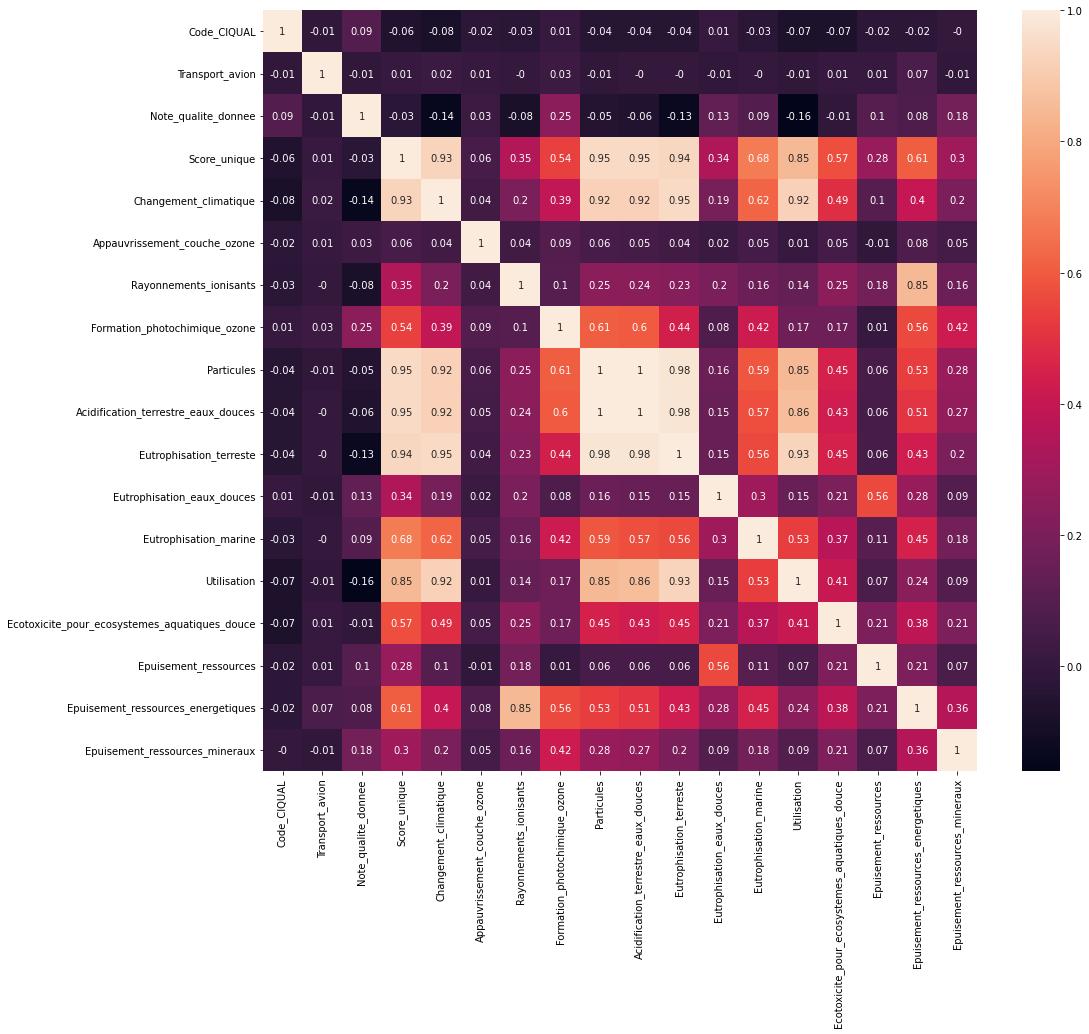

In [64]:
plt.figure(figsize=(16,14))
corr_matrix = np.round(synthese_df.corr(), 2)
print(corr_matrix['Changement_climatique'].sort_values(ascending=False))
ax = sns.heatmap(corr_matrix, annot=True)

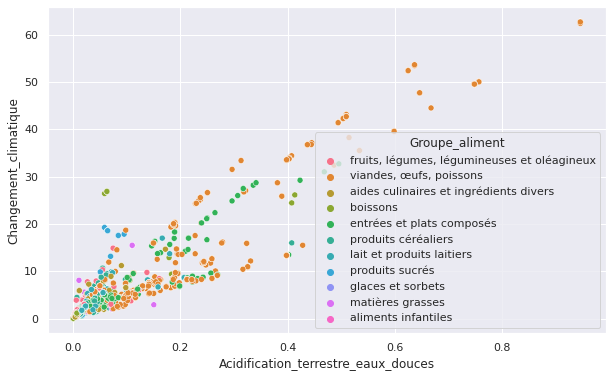

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=synthese_df, x='Acidification_terrestre_eaux_douces', y="Changement_climatique", hue='Groupe_aliment')
#plt.xticks(rotation=80);
plt.show()

In [ ]:
etapes_df = pd.read_csv('../data/raw/Agribalyse_Detail etape.csv')
etapes_df.info()

In [ ]:
etapes_df.head(5)

In [ ]:
plt.figure(figsize=(20,8))
#sns.set(rc={"figure.figsize":(20, 14)}) 
sns.displot(synthese_df, x='Changement_climatique',  kind='kde', hue='Groupe_aliment')
plt.xlim(-10,40)
plt.show()

In [ ]:
#cols = [4, 5, 6, 7]
#18 numeric features
num_col_names = synthese_df.select_dtypes(include=np.number).columns.to_list()

<class 'matplotlib.axes._subplots.AxesSubplot'>


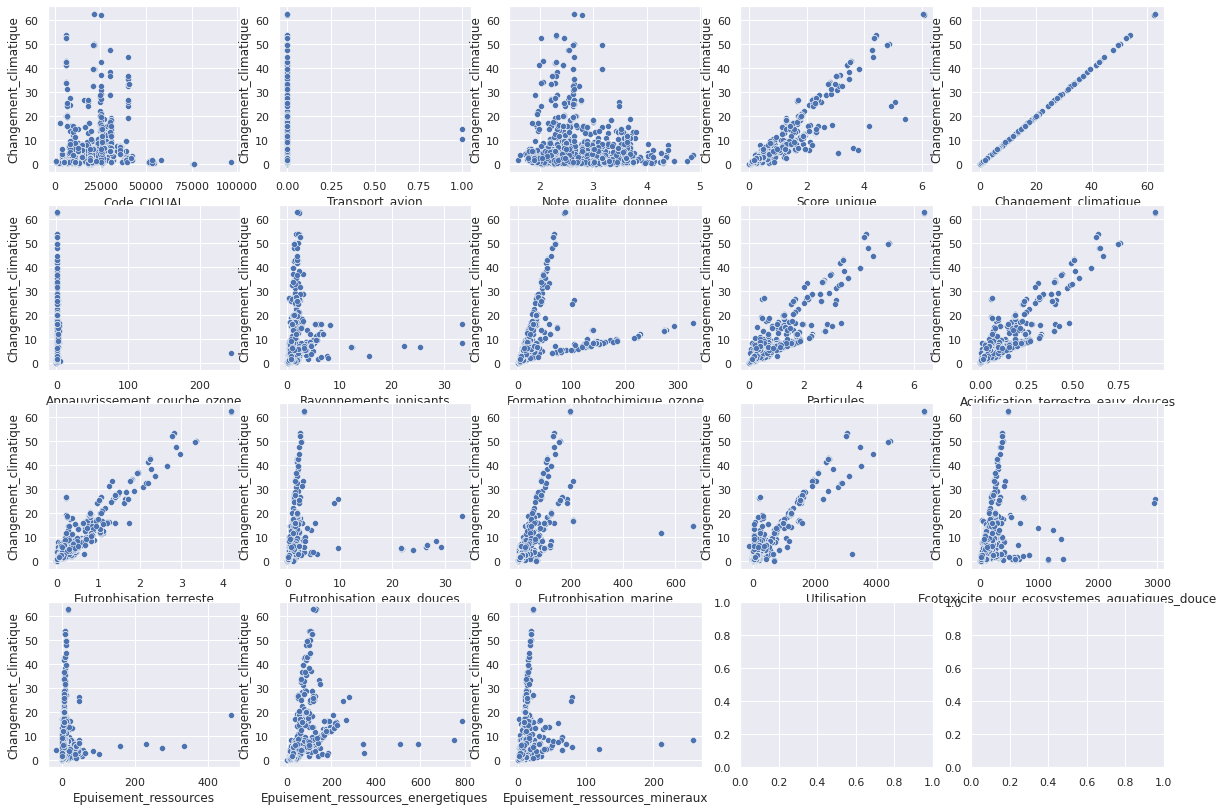

In [81]:
fig, axes = plt.subplots(4, 5)
print(type(axes[0,0]))
for i in range(18):
    col = num_col_names[i]
    sns.scatterplot(x=synthese_df[col], y=synthese_df['Changement_climatique'], ax=axes[i//5,i%5])    

detail_df = pd.read_csv('../data/raw/Agribalyse_Detail ingredient.csv')
detail_df.head(4)

In [84]:
ingred_df['Ingredients'].value_counts(ascending=False)[1:20]*100/len(synthese_df)

Farine de blé                                                     18.192820
Sucre blanc                                                       16.014522
Beurre                                                            11.173860
Lait demi-écremé                                                   8.834207
Œuf de poule                                                       6.857604
Oignons                                                            6.171843
Fromage frais crémeux                                              5.405405
Blanc d'oeuf                                                       5.042356
Huile combinée (mélange d'huile d'olive et d'huile de graines)     4.881000
Tomate                                                             4.517951
Jaune d'œuf                                                        4.477612
Carotte                                                            3.630496
Viande                                                             3.388463
Huile d'oliv

In [87]:
#top_ingredients = ingred_df['Ingredients'].value_counts(ascending=False)[1:20].index.tolist()
#top_ingredients
#plt.figure(figsize=(8,6))
Changement_climatique.sort_values(by=['Changement_climatique'], ascending=False).iloc[0:20,:].groupby('Ingredients').mean()


,Ciqual_AGB,Ciqual_code,Score_unique,Changement_climatique,Appauvrissement_couche_ozone,Rayonnements_ionisants,Formation_photochimique_ozone,Particules,Acidification_terrestre_eaux_douces,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Utilisation,Ecotoxicite_pour_ecosystemes_aquatiques_douce,Epuisement_ressources,Epuisement_ressources_energetiques,Epuisement_ressources_mineraux
Ingredients,,,,,,,,,,,,,,,,,
Abats de bœuf,8605.000000,8605.000000,1.879589,22.954743,0.382506,0.586085,28.351694,1.849044,0.276828,1.228894,1.009796,59.166309,1334.206900,156.615783,3.665212,34.494082,7.708800
Bœuf haché,25198.750000,25198.750000,2.164806,26.233848,0.477595,1.090449,32.497082,2.109286,0.315620,1.400324,1.176952,67.471509,1519.777550,182.179043,4.279860,48.469430,9.079463
Viande d'agneau sans os,25135.333333,25135.333333,2.878705,29.690939,0.544138,0.669629,40.756639,3.051284,0.453754,2.016872,1.497391,95.193224,2661.331333,227.150080,7.250333,47.351516,9.953481
Viande de bœuf sans os,28234.500000,28234.500000,1.835459,22.405158,0.374254,0.572225,27.710205,1.805384,0.270299,1.199885,0.989784,57.744295,1301.635912,153.750544,3.577465,33.738329,7.528654
Viande de moutton sans os,30155.500000,30155.500000,2.259560,23.305083,0.427106,0.525606,31.990799,2.395021,0.356162,1.583088,1.175336,74.719294,2088.938600,178.295190,5.690949,37.167265,7.812710


In [92]:
top_ingr_chang_clim = ingred_df.groupby('Ingredients').mean()['Changement_climatique'].sort_values(ascending=False)[:20]
top_ingr_chang_clim

Ingredients
Viande de moutton sans os    18.565066
Cacao                        17.355414
Viande de bœuf sans os       15.686338
Viande d'agneau sans os      15.582449
Bœuf haché                   15.143214
Viande de veau sans os       13.921072
Abats de bœuf                 8.042534
Lieu ou colin d'Alaska        7.158563
Crème                         6.644126
Morue                         5.652823
Abats de veau                 4.440226
Café                          4.405310
Viande                        4.236329
Chocolat noir                 3.963768
Viande avec os                3.955765
Poudre de cacao               2.702175
Beurre                        2.332137
Viande de poulet sans os      2.331935
Lotte                         2.098069
Chocolat au lait              2.019815
Name: Changement_climatique, dtype: float64

<AxesSubplot:>

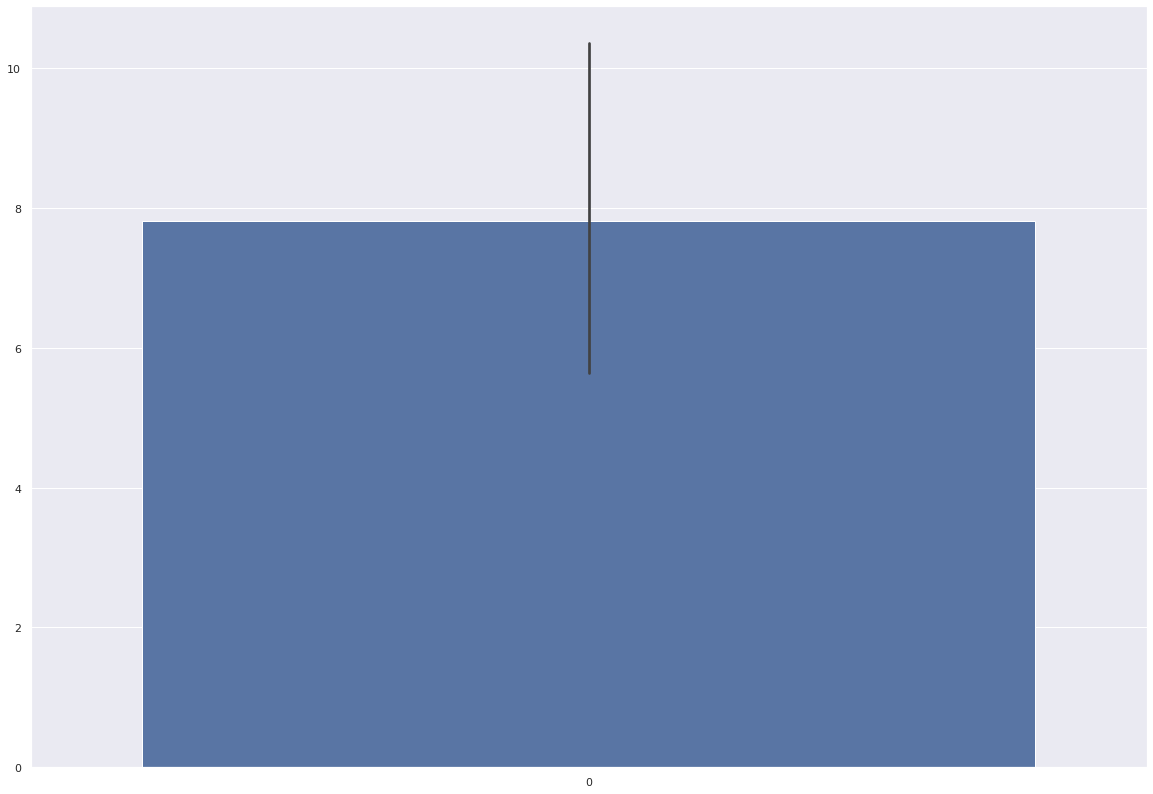

In [93]:
sns.barplot(data=top_ingr_chang_clim)

In [86]:
ingred_df[ingred_df['Ingredients'] == 'Farine de blé'].describe()

,Ciqual_AGB,Ciqual_code,Score_unique,Changement_climatique,Appauvrissement_couche_ozone,Rayonnements_ionisants,Formation_photochimique_ozone,Particules,Acidification_terrestre_eaux_douces,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Utilisation,Ecotoxicite_pour_ecosystemes_aquatiques_douce,Epuisement_ressources,Epuisement_ressources_energetiques,Epuisement_ressources_mineraux
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,22405.574279,22405.574279,0.026626,0.135596,0.012358,0.022535,0.595720,0.019653,0.003050,0.013402,0.048085,2.135437,28.086618,7.497822,0.079349,1.197181,0.264604
std,9276.505144,9276.505144,0.037246,0.189677,0.017287,0.031522,0.833313,0.027491,0.004267,0.018747,0.067262,2.987121,39.288503,10.488205,0.110996,1.674657,0.370137
min,4020.000000,4020.000000,0.000812,0.004138,0.000377,0.000688,0.018178,0.000600,0.000093,0.000409,0.001467,0.065162,0.857045,0.228791,0.002421,0.036531,0.008074
25%,23031.000000,23031.000000,0.014360,0.073127,0.006665,0.012153,0.321271,0.010599,0.001645,0.007228,0.025932,1.151639,15.147087,4.043568,0.042793,0.645638,0.142701
50%,24056.000000,24056.000000,0.022968,0.116968,0.010661,0.019439,0.513879,0.016953,0.002631,0.011561,0.041479,1.842066,24.228014,6.467754,0.068448,1.032709,0.228252
75%,25529.500000,25529.500000,0.033179,0.168965,0.015400,0.028080,0.742318,0.024489,0.003801,0.016700,0.059918,2.660936,34.998309,9.342922,0.098876,1.491789,0.329719
max,96778.000000,96778.000000,0.753436,3.836911,0.349700,0.637649,16.856812,0.556107,0.086318,0.379223,1.360629,60.425471,794.753940,212.162370,2.245304,33.876065,7.487378


### 213 ingredients

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=synthese_df, x ='Groupe d\'aliment', y='Changement climatique (kg CO2 eq/kg de produit)')
plt.xticks(rotation=80)

In [ ]:
#plt.figure(figsize=(12,8))
sns.barplot(data=synthese_df, x ='Groupe d\'aliment', y ='Appauvrissement de la couche d\'ozone (E-06 kg CVC11 eq/kg de produit)')
plt.xticks(rotation=80)


In [ ]:
from matplotlib import rcParams


In [ ]:
[func for func in dir(ax) if func.startswith("get")]
print()